In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/content/DailyDelhiClimateTrain.csv")

In [3]:
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [4]:
df["date"] = pd.to_datetime(df["date"])

In [5]:
df.set_index("date",inplace=True)

In [6]:
df.head()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [7]:
ts = df["meantemp"]

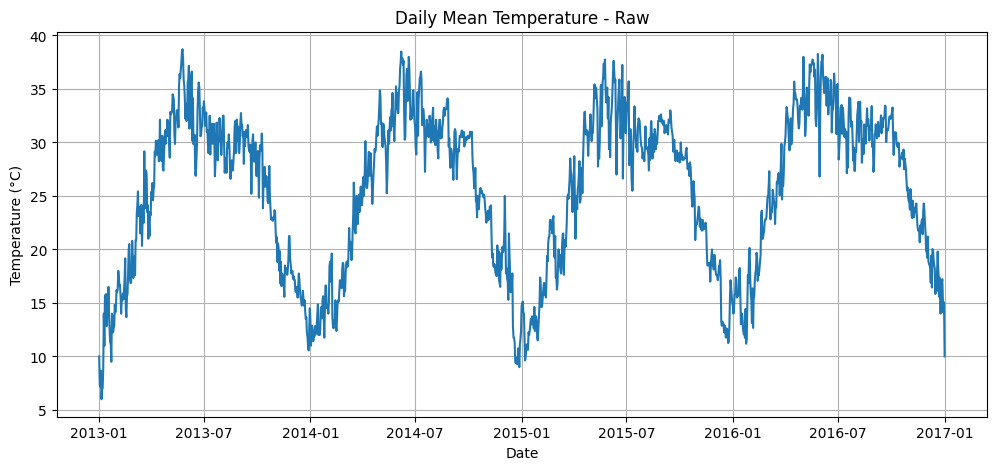

In [8]:
plt.figure(figsize=(12,5))
plt.plot(ts, label='Raw Data')
plt.title("Daily Mean Temperature - Raw")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.show()

In [9]:
rolling_7 = ts.rolling(window=7).mean()    # 7-day rolling
rolling_30 = ts.rolling(window=30).mean()  # 30-day rolling


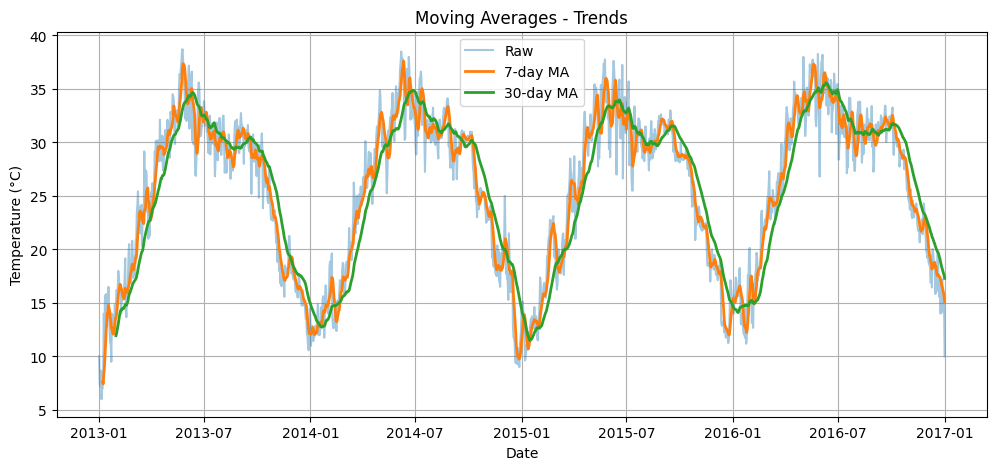

In [10]:
plt.figure(figsize=(12,5))
plt.plot(ts, alpha=0.4, label='Raw')
plt.plot(rolling_7, label='7-day MA', linewidth=2)
plt.plot(rolling_30, label='30-day MA', linewidth=2)
plt.title("Moving Averages - Trends")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid(True)
plt.show()


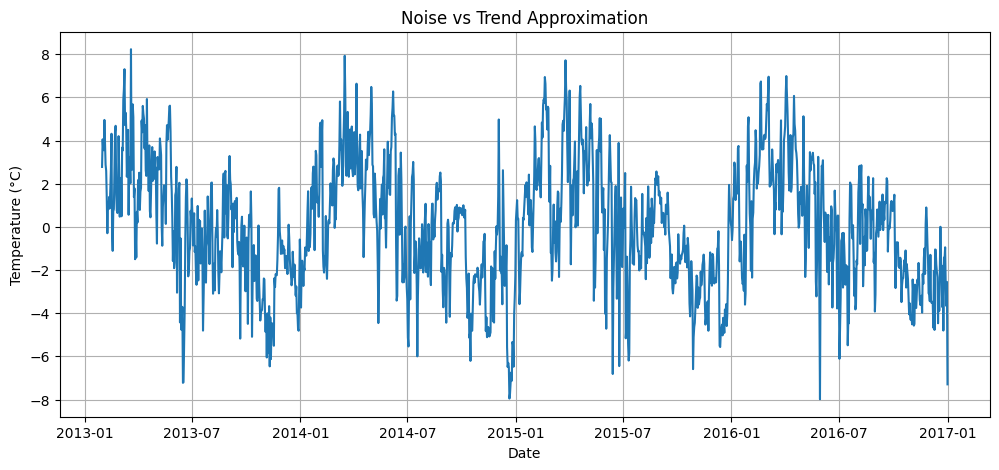

In [11]:
trend = ts - ts.rolling(window=30).mean()  # approximate noise
plt.figure(figsize=(12,5))
plt.plot(trend, label='Noise / Detrended')
plt.title("Noise vs Trend Approximation")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.show()

/tmp/ipython-input-3558241863.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = ts.resample('M').mean()


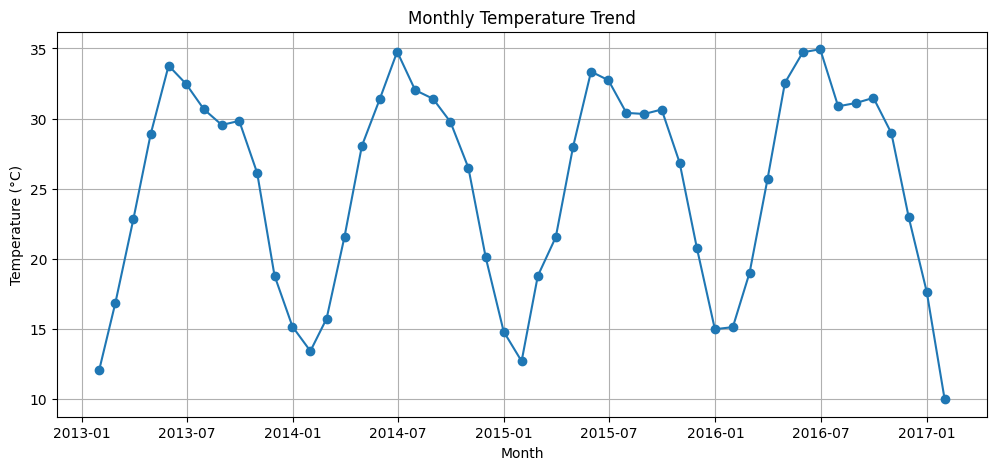

In [12]:
monthly = ts.resample('M').mean()
plt.figure(figsize=(12,5))
plt.plot(monthly, marker='o', label='Monthly Average')
plt.title("Monthly Temperature Trend")
plt.xlabel("Month")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.show()
